<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,32.255964,87.435988,0.004954,129.696906,129.692561,0.004345
1,0.0,1.0,20.750776,60.696459,0.002638,91.449873,91.447660,0.002213
2,0.0,2.0,54.279467,87.600880,0.006578,151.886925,151.881144,0.005781
3,0.0,3.0,94.036256,48.338421,-0.005710,152.368967,152.375685,-0.006718
4,0.0,4.0,64.062826,62.566620,-0.009626,136.619819,136.630244,-0.010425
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,91.024055,79.451921,0.009201,180.485177,180.477539,0.007638
119996,999.0,116.0,62.618661,31.961619,0.021091,104.601372,104.574810,0.026562
119997,999.0,117.0,20.662074,30.715533,-0.019818,61.357789,61.370783,-0.012994
119998,999.0,118.0,64.040928,42.009746,-0.025930,116.024743,116.046561,-0.021818


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    32.255964  87.435988  0.004954  129.696906  129.692561  0.004345
      1.0    20.750776  60.696459  0.002638   91.449873   91.447660  0.002213
      2.0    54.279467  87.600880  0.006578  151.886925  151.881144  0.005781
      3.0    94.036256  48.338421 -0.005710  152.368967  152.375685 -0.006718
      4.0    64.062826  62.566620 -0.009626  136.619819  136.630244 -0.010425
...                ...        ...       ...         ...         ...       ...
999.0 115.0  91.024055  79.451921  0.009201  180.485177  180.477539  0.007638
      116.0  62.618661  31.961619  0.021091  104.601372  104.574810  0.026562
      117.0  20.662074  30.715533 -0.019818   61.357789   61.370783 -0.012994
      118.0  64.040928  42.009746 -0.025930  116.024743  116.046561 -0.021818
      119.0  25.208585  72.472295 -0.006351  107.674529  107.679662 -0.005133

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    32.255964  87.435988  0.004954  129.696906  129.692561  0.004345
      1.0    20.750776  60.696459  0.002638   91.449873   91.447660  0.002213
      2.0    54.279467  87.600880  0.006578  151.886925  151.881144  0.005781
      3.0    94.036256  48.338421 -0.005710  152.368967  152.375685 -0.006718
      4.0    64.062826  62.566620 -0.009626  136.619819  136.630244 -0.010425
...                ...        ...       ...         ...         ...       ...
999.0 115.0  91.024055  79.451921  0.009201  180.485177  180.477539  0.007638
      116.0  62.618661  31.961619  0.021091  104.601372  104.574810  0.026562
      117.0  20.662074  30.715533 -0.019818   61.357789   61.370783 -0.012994
      118.0  64.040928  42.009746 -0.025930  116.024743  116.046561 -0.021818
      119.0  25.208585  72.472295 -0.006351  107.674529  107.679662 -0.005133

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,32.255964,87.435988,0.004954,129.696906,129.692561,0.004345
1,0.0,1.0,20.750776,60.696459,0.002638,91.449873,91.447660,0.002213
2,0.0,2.0,54.279467,87.600880,0.006578,151.886925,151.881144,0.005781
3,0.0,3.0,94.036256,48.338421,-0.005710,152.368967,152.375685,-0.006718
4,0.0,4.0,64.062826,62.566620,-0.009626,136.619819,136.630244,-0.010425
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,91.024055,79.451921,0.009201,180.485177,180.477539,0.007638
119996,999.0,116.0,62.618661,31.961619,0.021091,104.601372,104.574810,0.026562
119997,999.0,117.0,20.662074,30.715533,-0.019818,61.357789,61.370783,-0.012994
119998,999.0,118.0,64.040928,42.009746,-0.025930,116.024743,116.046561,-0.021818


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    32.255964  87.435988  0.004954  129.696906  129.692561  0.004345
      1.0    20.750776  60.696459  0.002638   91.449873   91.447660  0.002213
      2.0    54.279467  87.600880  0.006578  151.886925  151.881144  0.005781
      3.0    94.036256  48.338421 -0.005710  152.368967  152.375685 -0.006718
      4.0    64.062826  62.566620 -0.009626  136.619819  136.630244 -0.010425
...                ...        ...       ...         ...         ...       ...
999.0 115.0  91.024055  79.451921  0.009201  180.485177  180.477539  0.007638
      116.0  62.618661  31.961619  0.021091  104.601372  104.574810  0.026562
      117.0  20.662074  30.715533 -0.019818   61.357789   61.370783 -0.012994
      118.0  64.040928  42.009746 -0.025930  116.024743  116.046561 -0.021818
      119.0  25.208585  72.472295 -0.006351  107.674529  107.679662 -0.005133

[120000 rows x 6 columns]

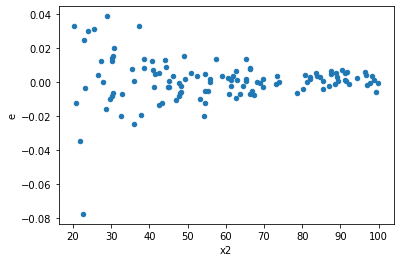

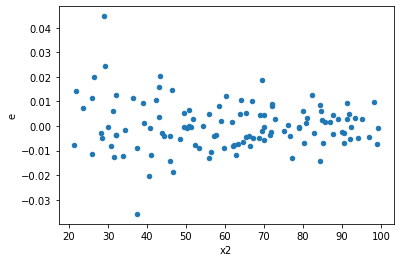

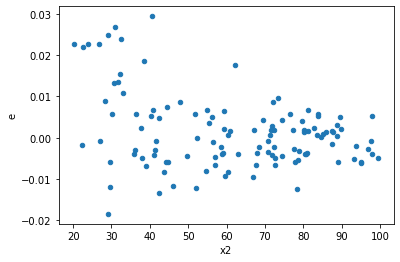

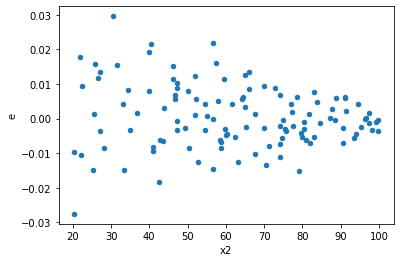

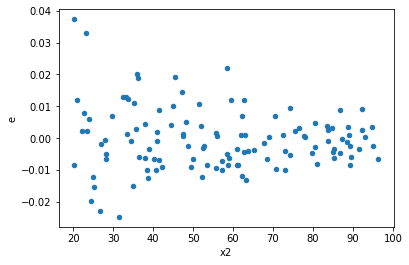

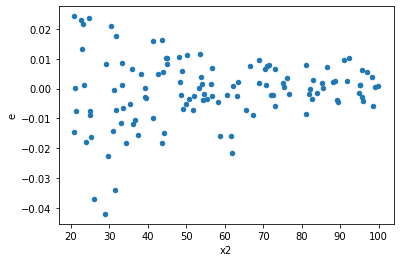

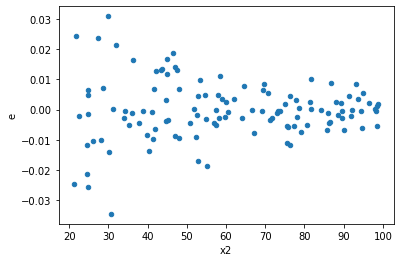

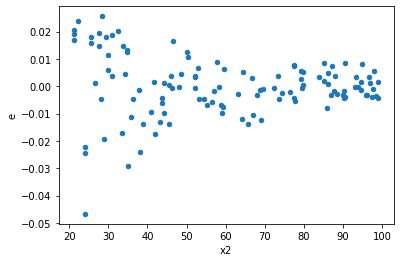

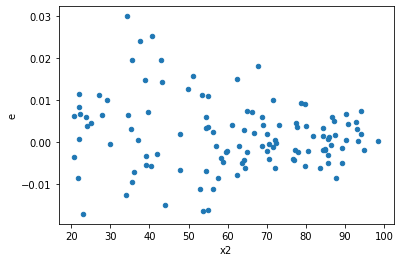

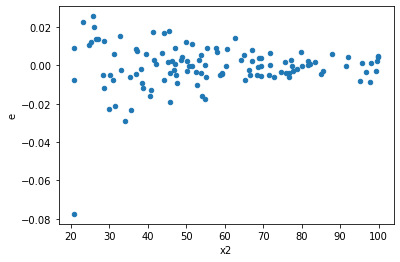

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,58.0,58.0,0.0012924190119517494,0.005860768040783489,2.2283086412961198e-05,0.00010104772484109464,4.534727504459128,4.01125741511521e-08,0.9999999799437129,2.005628707557605e-08,Reject001=0 : Heteroscedasticity
4.0,59.0,57.0,0.002299132094272995,0.00832867415090077,3.896834058089822e-05,0.00014611709036668017,3.749635940061171,1.389019609776554e-06,0.9999993054901951,6.94509804888277e-07,Reject001=0 : Heteroscedasticity
5.0,67.0,49.0,0.006124035527392976,0.007898108561138975,9.140351533422353e-05,0.0001611858890028362,1.7634539373398104,0.03870091635466877,0.9806495418226656,0.019350458177334384,Reject001=1 : Homoscedasticity
8.0,57.0,59.0,0.0026349757998658956,0.005010387516568106,4.622764561168238e-05,8.492182231471366e-05,1.8370354187636309,0.02181470106551875,0.9890926494672406,0.010907350532759374,Reject001=1 : Homoscedasticity
11.0,65.0,51.0,0.0024803156580609467,0.008517825144745118,3.815870243170687e-05,0.0001670161793087278,4.376883087354421,2.1434848251900007e-07,0.9999998928257587,1.0717424125950004e-07,Reject001=0 : Heteroscedasticity
15.0,73.0,43.0,0.0027801792243825887,0.009762218142687743,3.808464690935053e-05,0.00022702832889971497,5.961150944633678,7.4011938799856125e-09,0.9999999962994031,3.7005969399928063e-09,Reject001=0 : Heteroscedasticity
17.0,55.0,61.0,0.0019407537034421862,0.012910073449150896,3.528643097167611e-05,0.00021164054834673602,5.997788456322395,8.648393112764552e-11,0.999999999956758,4.324196556382276e-11,Reject001=0 : Heteroscedasticity
20.0,55.0,61.0,0.002103430417280523,0.006193759304608481,3.824418940510042e-05,0.00010153703778046689,2.654966397769316,0.00025064248996153893,0.9998746787550192,0.00012532124498076946,Reject001=0 : Heteroscedasticity
21.0,51.0,65.0,0.0020962922795550237,0.009726634109363965,4.1103770187353404e-05,0.00014964052475944562,3.64055472472173,1.3236080202982947e-06,0.9999993381959899,6.618040101491474e-07,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,65.0,51.0,0.018492303281355003,0.001743857703476414,0.00028449697355930774,3.41932883034591e-05,0.12018858364527026,1.9216065298981256e-14,Reject001=0 : Heteroscedasticity
1.0,51.0,65.0,0.006303429357310778,0.00484874361393736,0.00012359665406491723,7.459605559903631e-05,0.6035442962708026,0.06270490912308797,Reject001=1 : Homoscedasticity
2.0,58.0,58.0,0.0012924190119517494,0.005860768040783489,2.2283086412961198e-05,0.00010104772484109464,4.534727504459128,4.01125741511521e-08,Reject001=0 : Heteroscedasticity
3.0,65.0,51.0,0.007618899892194587,0.00205935807324168,0.00011721384449530133,4.037957006356235e-05,0.34449488656761035,5.9604600455025356e-05,Reject001=0 : Heteroscedasticity
4.0,59.0,57.0,0.002299132094272995,0.00832867415090077,3.896834058089822e-05,0.00014611709036668017,3.749635940061171,1.389019609776554e-06,Reject001=0 : Heteroscedasticity
5.0,67.0,49.0,0.006124035527392976,0.007898108561138975,9.140351533422353e-05,0.0001611858890028362,1.7634539373398104,0.03870091635466877,Reject001=1 : Homoscedasticity
6.0,64.0,52.0,0.009344775016366222,0.0017356077860446564,0.00014601210963072222,3.337707280855108e-05,0.22859112776991378,4.3514543673727226e-08,Reject001=0 : Heteroscedasticity
7.0,73.0,43.0,0.01285412289579098,0.001269556821253895,0.00017608387528480796,2.9524577238462674e-05,0.16767337265100488,2.9185666915416554e-11,Reject001=0 : Heteroscedasticity
8.0,57.0,59.0,0.0026349757998658956,0.005010387516568106,4.622764561168238e-05,8.492182231471366e-05,1.8370354187636309,0.02181470106551875,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    911
Reject001=1 : Homoscedasticity       89
Name: Result_test, dtype: int64